In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df=pd.DataFrame.merge(ride_data,city_data, on= 'city',how='left')

# Display the data table for preview
df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

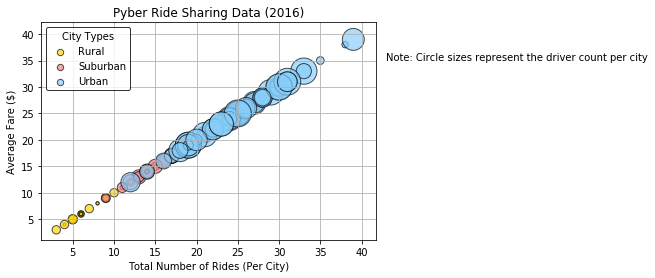

In [16]:
# Obtain the x and y coordinates for each of the three city types
threecities= df.groupby("city")
avg_fare= threecities.mean()["fare"]
drivers= threecities.mean()["driver_count"]
ride_count= threecities["ride_id"].count()
city_type= city_data.set_index("city")["type"]
citydataframe= pd.DataFrame({"Number of Drivers": drivers,
                            "Average Fare": ride_count,
                             "Ride Count": ride_count,
                            "City Type": city_type})
citydataframe.head()
# Build the scatter plots for each city types
rural= citydataframe[citydataframe["City Type"]== "Rural"]
plt.scatter(rural["Ride Count"], rural["Average Fare"], s=rural["Number of Drivers"]*10,
           edgecolor="black", alpha= 0.68, color= "gold", linewidths= 1.0, label= "Rural")
suburban= citydataframe[citydataframe["City Type"]== "Suburban"]
plt.scatter(suburban["Ride Count"], suburban["Average Fare"], s= suburban["Number of Drivers"]*10,
           edgecolor= "black", alpha= 0.68, color= "lightcoral", linewidths= 1.0, label= "Suburban")
urban= citydataframe[citydataframe["City Type"]== "Urban"]
plt.scatter(urban["Ride Count"], urban["Average Fare"], s= urban["Number of Drivers"]*10,
           edgecolor= "black", alpha= 0.68, color= "lightskyblue", linewidths= 1.0, label= "Urban")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend= plt.legend(title= "City Types", edgecolor="black")
legend.legendHandles[0]._sizes= [40]
legend.legendHandles[1]._sizes= [40]
legend.legendHandles[2]._sizes= [40]

# Incorporate a text label regarding circle size
plt.text(s="Note: Circle sizes represent the driver count per city", y= 35, x= 43)
# Save Figure
plt.savefig("pyber_scatter_output.png", bbox_inches= "tight")


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

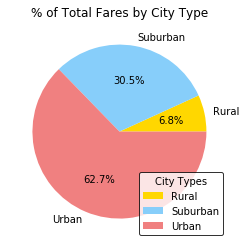

In [24]:
# Calculate Type Percents
totalfares= df.groupby("type")["fare","type"]
fares= totalfares.sum()["fare"]
# Build Pie Chart
labels= ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0,0.1)
plt.pie(fares, colors= colors, labels= labels, 
       autopct= "%1.1f%%")
plt.title("Percent of Total Fares by City Type")
legendpie= plt.legend(title= "City Types", edgecolor= "black", loc= "lower right")
legendpie.legendHandles[0]._sizes=[40]
legendpie.legendHandles[1]._sizes=[40]
legendpie.legendHandles[2].sizes=[40]
# Save Figure
plt.savefig("pyber_piechart_output1.png", bbox_inches= "tight")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

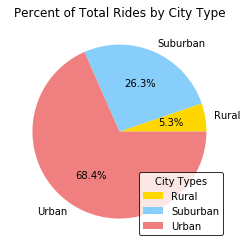

In [25]:
# Calculate Ride Percents
ridecount= df.groupby("type")["ride_id"]
rides= ridecount.count()
# Build Pie Chart
plt.pie(rides, colors=colors, labels=labels,
       autopct="%1.1f%%")
plt.title("Percent of Total Rides by City Type")
legendcity = plt.legend(title="City Types", edgecolor="black", loc="lower right")
legendcity.legendHandles[0]._sizes=[40]
legendcity.legendHandles[1]._sizes=[40]
legendcity.legendHandles[2]._sizes=[40]
# Save Figure
plt.savefig("pyber_piechart_output2.png", bbox_inches="tight")



In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

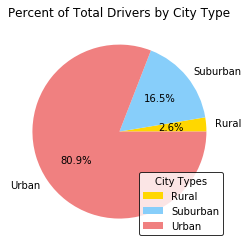

In [28]:
# Calculate Driver Percents
totaldrivers= df.drop_duplicates("city", keep= "first")
drivers_df= totaldrivers.groupby("type")
drivers= drivers_df.sum()["driver_count"]

# Build Pie Charts
plt.pie(drivers, colors=colors, labels=labels,
       autopct="%1.1f%%")
plt.title("Percent of Total Drivers by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[40]
leg.legendHandles[1]._sizes=[40]
leg.legendHandles[2]._sizes=[40]
# Save Figure
plt.savefig("pyber_piechart_output3.png", bboxinches="tight")



In [27]:
# Show Figure
plt.show()